# Project 3: 'Image Analysis'
## First Year Project  
### ITU, Spring 2021

This notebook contains all the code developed to explore, wrangle and analyse the raw data sets for our project, 'Image Analysis'.

Contributors:  
- Andy Bao Nguyen (anbn)
- Florian Micliuc (flmi)
- Mattias Wohlert 
- Sofia Elena Terenziani (sote)

Created: 06-04-2021 

Last modified:

### Imports

In [1]:
import cv2
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
from skimage import morphology
from scipy.spatial.distance import cdist
from scipy.stats.stats import mode
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

### Functions

### Loading the data

## Task 0 - Data checking and filtering

## Task 1 - Feature analysis

## Task 2 - Diagnosis prediction

## Task 3 - Open question

# WORK IN PROGRESS

In [2]:
#Example_ground_truth
#Features
ex_ground = pd.read_csv("../data/raw/example_ground_truth.csv")
features = pd.read_csv("../data/features/features.csv")
images = ("../data/raw/example_image/")
segmentations = ("../data/raw/example_segmentation/")

In [3]:
# Create a DataFrame object
df_exground = pd.DataFrame(ex_ground, columns =['image_id', 'melanoma', 'seborrheic_keratosis'])

# Iterate over the index range from
# 0 to max number of columns in dataframe
for i in range(df_exground.shape[1]):

    print('Column Number : ', i)

    # Select column by index position using iloc[]
    columnSeriesObj = df_exground.iloc[:, i]
    print('Column Contents : ', columnSeriesObj.values)

Column Number :  0
Column Contents :  ['ISIC_0001769' 'ISIC_0001852' 'ISIC_0001871' 'ISIC_0003462'
 'ISIC_0003539' 'ISIC_0003582' 'ISIC_0003657' 'ISIC_0003805'
 'ISIC_0004337' 'ISIC_0006651' 'ISIC_0006671' 'ISIC_0006815'
 'ISIC_0006914' 'ISIC_0007141' 'ISIC_0007156' 'ISIC_0007235'
 'ISIC_0007241' 'ISIC_0007332' 'ISIC_0007344' 'ISIC_0007528'
 'ISIC_0007796' 'ISIC_0008025' 'ISIC_0008524' 'ISIC_0009995'
 'ISIC_0010459' 'ISIC_0012099' 'ISIC_0012109' 'ISIC_0012126'
 'ISIC_0012127' 'ISIC_0012143' 'ISIC_0012151' 'ISIC_0012159'
 'ISIC_0012160' 'ISIC_0012191' 'ISIC_0012201' 'ISIC_0012204'
 'ISIC_0012206' 'ISIC_0012210' 'ISIC_0012221' 'ISIC_0012222'
 'ISIC_0012254' 'ISIC_0012256' 'ISIC_0012288' 'ISIC_0012306'
 'ISIC_0012313' 'ISIC_0012316' 'ISIC_0012335' 'ISIC_0012380'
 'ISIC_0012383' 'ISIC_0012400' 'ISIC_0012417' 'ISIC_0012434'
 'ISIC_0012492' 'ISIC_0012513' 'ISIC_0012538' 'ISIC_0012547'
 'ISIC_0012660' 'ISIC_0012684' 'ISIC_0012720' 'ISIC_0012746'
 'ISIC_0012876' 'ISIC_0012927' 'ISIC_0012956' '

In [4]:
features

,id,area,perimeter
0,ISIC_0001769,216160.0,2013.0
1,ISIC_0001852,130493.0,1372.0
2,ISIC_0001871,205116.0,1720.0
3,ISIC_0003462,161705.0,1344.0
4,ISIC_0003539,317040.0,2063.0
...,...,...,...
145,ISIC_0015443,9732988.0,13775.0
146,ISIC_0015445,12049938.0,19517.0
147,ISIC_0015483,8856478.0,13813.0
148,ISIC_0015496,8951522.0,13742.0


# Loading of data and scripts

In [5]:
%run ../Scripts/fyp2021p3_group00_functions.py

(2848, 4288, 3)


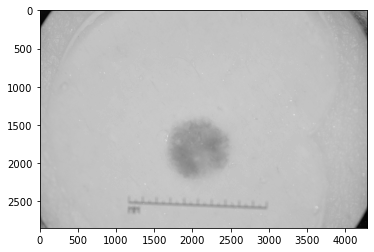

In [6]:
im = plt.imread("../Data/Raw/example_image/ISIC_0014310.jpg")
print(im.shape)
plt.imshow(im)
plt.imshow(im[:,:,0], cmap='gray')

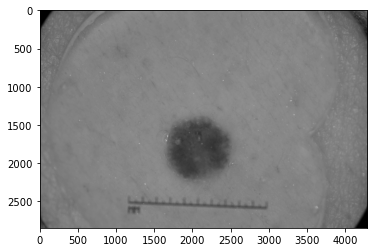

In [7]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r * 0.5870 * g + 0.1140 * b
    return gray

grey = rgb2gray(im)
plt.imshow(grey,  cmap = "gray")

# Lesion is darker, and extract a mask of it

(array([[243.,  58., 123., ...,   0.,   0.,   0.],
        [239.,  63., 118., ...,   0.,   0.,   0.],
        [238.,  66., 110., ...,   0.,   0.,   0.],
        ...,
        [284., 195., 182., ...,   0.,   0.,   0.],
        [282., 199., 180., ...,   0.,   0.,   0.],
        [285., 203., 171., ...,   0.,   0.,   0.]]),
 array([   52.8722927 ,  1191.36084918,  2329.84940566,  3468.33796214,
         4606.82651862,  5745.3150751 ,  6883.80363158,  8022.29218806,
         9160.78074454, 10299.26930102, 11437.7578575 ]),
 <a list of 4288 BarContainer objects>)

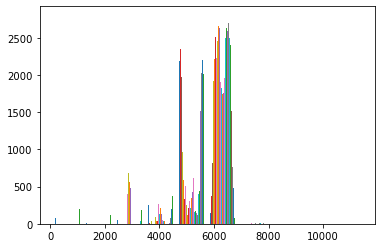

In [8]:
plt.hist(grey)
# Will run for a minute or two

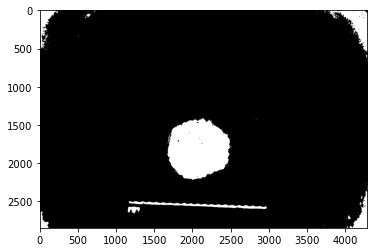

In [9]:
# Our lesion is in the smaller clusters (The darker pixels), and the greater ones must be the pixels of the skin
im_lim = grey < 4500
plt.imshow(im_lim, cmap = "gray") # We see a little noice within our lesion

In [10]:
blurimg = cv2.imread("ISIC_0014310.jpg", cv2.IMREAD_GRAYSCALE)

In [11]:
# This will get all the files in a folder in onlyfiles. And then it will read them all and store them in the array images.
onlyfiles = [f for f in os.listdir(images) if os.path.isfile(os.path.join(images, f))]
image_s = np.empty(len(onlyfiles), dtype = object)
for n in range(0, len(onlyfiles)):
    image_s[n] = cv2.imread(os.path.join(images, onlyfiles[n]))

In [12]:
for i in image_s:
    print(i)

None
[[[ 82 107 139]
  [ 82 108 138]
  [ 85 109 139]
  ...
  [116 133 159]
  [116 133 160]
  [115 131 160]]

 [[ 80 109 140]
  [ 80 108 139]
  [ 82 107 139]
  ...
  [113 133 158]
  [115 132 158]
  [114 131 158]]

 [[ 78 109 142]
  [ 79 107 141]
  [ 80 108 139]
  ...
  [113 134 156]
  [115 132 158]
  [116 131 157]]

 ...

 [[108 124 147]
  [108 124 147]
  [110 124 147]
  ...
  [119 132 148]
  [119 131 149]
  [122 132 150]]

 [[107 123 146]
  [107 123 146]
  [109 125 148]
  ...
  [118 133 149]
  [120 132 150]
  [121 130 150]]

 [[108 124 147]
  [108 124 147]
  [106 124 147]
  ...
  [118 132 150]
  [120 131 151]
  [122 130 153]]]
[[[109 125 137]
  [111 124 138]
  [115 126 140]
  ...
  [ 93 113 138]
  [ 91 111 136]
  [ 93 110 136]]

 [[108 124 136]
  [109 125 138]
  [112 125 139]
  ...
  [ 93 111 134]
  [ 93 110 136]
  [ 93 110 136]]

 [[109 125 138]
  [109 125 138]
  [107 123 136]
  ...
  [ 93 110 136]
  [ 93 110 136]
  [ 93 110 136]]

 ...

 [[ 90 111 138]
  [ 89 110 137]
  [ 92 111 138]

  [ 18  13  15]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0  38]
  [  0   0  38]
  [  0   0  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0  38]
  [  0   0  38]
  [  0   0  38]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0  38]
  [  0   0  38]
  [  0   0  38]]

 ...

 [[  0   3 221]
  [  0   3 221]
  [  0   3 221]
  ...
  [  0   3 241]
  [  0   3 241]
  [  0   3 241]]

 [[  0   3 221]
  [  0   3 221]
  [  0   3 221]
  ...
  [  0   3 241]
  [  0   3 241]
  [  0   3 241]]

 [[  0   3 221]
  [  0   3 221]
  [  0   3 221]
  ...
  [  0   3 241]
  [  0   3 241]
  [  0   3 241]]]
[[[ 23  21  20]
  [ 23  21  21]
  [ 22  20  20]
  ...
  [168 133 100]
  [166 131  98]
  [173 136 102]]

 [[ 24  22  22]
  [ 23  21  21]
  [ 22  20  20]
  ...
  [166 131  97]
  [170 134  98]
  [174 138 102]]

 [[ 23  21  21]
  [ 22  20  20]
  [ 21  19  19]
  ...
  [166 130  94]
  [175 138 100]
  [177 141 101]]

 ...

 [[144 126 109]
  [149 131 114]
  

In [13]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
load_images_from_folder(images)